In [ ]:
words = [x.lower() for x in open('male_names_rus.txt', 'r').read().splitlines()]

In [ ]:
words[:10]

['аарон',
 'аба',
 'аббас',
 'абд аль-узза',
 'абдуллах',
 'абид',
 'аботур',
 'аввакум',
 'август',
 'авдей']

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import random

# # Загрузка данных из файла names.txt
# with open('names.txt', 'r', encoding='utf-8') as file:
#     names = file.read().split('\n')

# # Предобработка данных
# all_letters = ''.join(set(''.join(names)))
# n_letters = len(all_letters)

# # Создание словаря для кодирования и декодирования символов
# char_to_index = {char: i for i, char in enumerate(all_letters)}
# index_to_char = {i: char for i, char in enumerate(all_letters)}

# # Преобразование имен в тензоры PyTorch
# def name_to_tensor(name):
#     tensor = torch.zeros(len(name), 1, n_letters)
#     for i, char in enumerate(name):
#         tensor[i][0][char_to_index[char]] = 1
#     return tensor

# # Создание класса модели
# class MarkovChainGenerator(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MarkovChainGenerator, self).__init__()
#         self.hidden_size = hidden_size
#         self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
#         self.i2o = nn.Linear(input_size + hidden_size, output_size)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input, hidden):
#         combined = torch.cat((input, hidden), 1)
#         hidden = self.i2h(combined)
#         output = self.i2o(combined)
#         output = self.softmax(output)
#         return output, hidden

#     def init_hidden(self):
#         return torch.zeros(1, self.hidden_size)

# # Функция обучения модели
# def train(model, input_tensor, criterion, optimizer):
#     if input_tensor.size(0) == 0:
#         return 0  # Пустая строка, не выполняем обучение

#     hidden = model.init_hidden()
#     optimizer.zero_grad()

#     output, hidden = model(input_tensor[0], hidden)
#     loss = criterion(output, torch.argmax(input_tensor[-1], dim=1))

#     loss.backward()
#     optimizer.step()

#     return loss.item()



# # Функция генерации нового имени
# def generate_name(model, starting_char, max_length=20):
#     with torch.no_grad():
#         input_tensor = name_to_tensor(starting_char)
#         hidden = model.init_hidden()

#         output_name = starting_char

#         for _ in range(max_length):
#             output, hidden = model(input_tensor[-1], hidden)
#             _, topi = output.topk(1)
#             char_index = topi[0][0].item()
#             char = index_to_char[char_index]
#             output_name += char

#             if char == '\n':
#                 break

#             input_tensor = name_to_tensor(char)

#         return output_name

# # Параметры модели
# input_size = n_letters
# hidden_size = 128
# output_size = n_letters

# # Инициализация модели, функции потерь и оптимизатора
# model = MarkovChainGenerator(input_size, hidden_size, output_size)
# criterion = nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# # Обучение модели
# num_epochs = 10

# for epoch in range(num_epochs):
#     random.shuffle(names)

#     for name in names:
#         input_tensor = name_to_tensor(name)
#         loss = train(model, input_tensor, criterion, optimizer)

#     print(f'Epoch {epoch}, Loss: {loss:.4f}')

# # Генерация новых имен
# for _ in range(5):
#     starting_char = random.choice(all_letters)
#     generated_name = generate_name(model, starting_char)
#     print(f'Generated Name: {generated_name}')


In [ ]:
len(words)

736

In [ ]:
min(len(w) for w in words)

0

In [ ]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('н', '<E>'), 140),
 (('а', 'н'), 115),
 (('<S>', 'а'), 113),
 (('й', '<E>'), 107),
 (('а', 'р'), 83),
 (('и', 'й'), 77),
 (('р', 'и'), 76),
 (('р', '<E>'), 69),
 (('о', 'н'), 64),
 (('л', 'а'), 59),
 (('а', 'в'), 58),
 (('м', 'а'), 54),
 (('е', 'р'), 53),
 (('т', '<E>'), 51),
 (('а', 'л'), 50),
 (('<S>', 'м'), 50),
 (('л', 'ь'), 49),
 (('л', 'и'), 49),
 (('р', 'а'), 48),
 (('<S>', 'к'), 48),
 (('и', 'л'), 47),
 (('и', 'с'), 44),
 (('<S>', 'и'), 44),
 (('р', 'о'), 43),
 (('е', 'н'), 43),
 (('м', '<E>'), 42),
 (('о', 'р'), 41),
 (('т', 'и'), 41),
 (('и', 'н'), 41),
 (('<S>', 'в'), 41),
 (('<S>', 'г'), 40),
 (('с', '<E>'), 39),
 (('и', 'к'), 39),
 (('д', '<E>'), 38),
 (('н', 'и'), 38),
 (('<S>', 'с'), 38),
 (('с', 'т'), 37),
 (('а', 'д'), 36),
 (('н', 'а'), 36),
 (('<S>', 'п'), 36),
 (('а', 'т'), 35),
 (('<S>', 'ф'), 35),
 (('а', 'с'), 34),
 (('<S>', 'д'), 34),
 (('е', 'й'), 33),
 (('и', 'м'), 33),
 (('д', 'и'), 32),
 (('м', 'и'), 32),
 (('е', 'л'), 31),
 (('а', 'м'), 31),
 (('к', 'а')

In [ ]:
import torch

In [ ]:
N = torch.zeros((34, 34), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


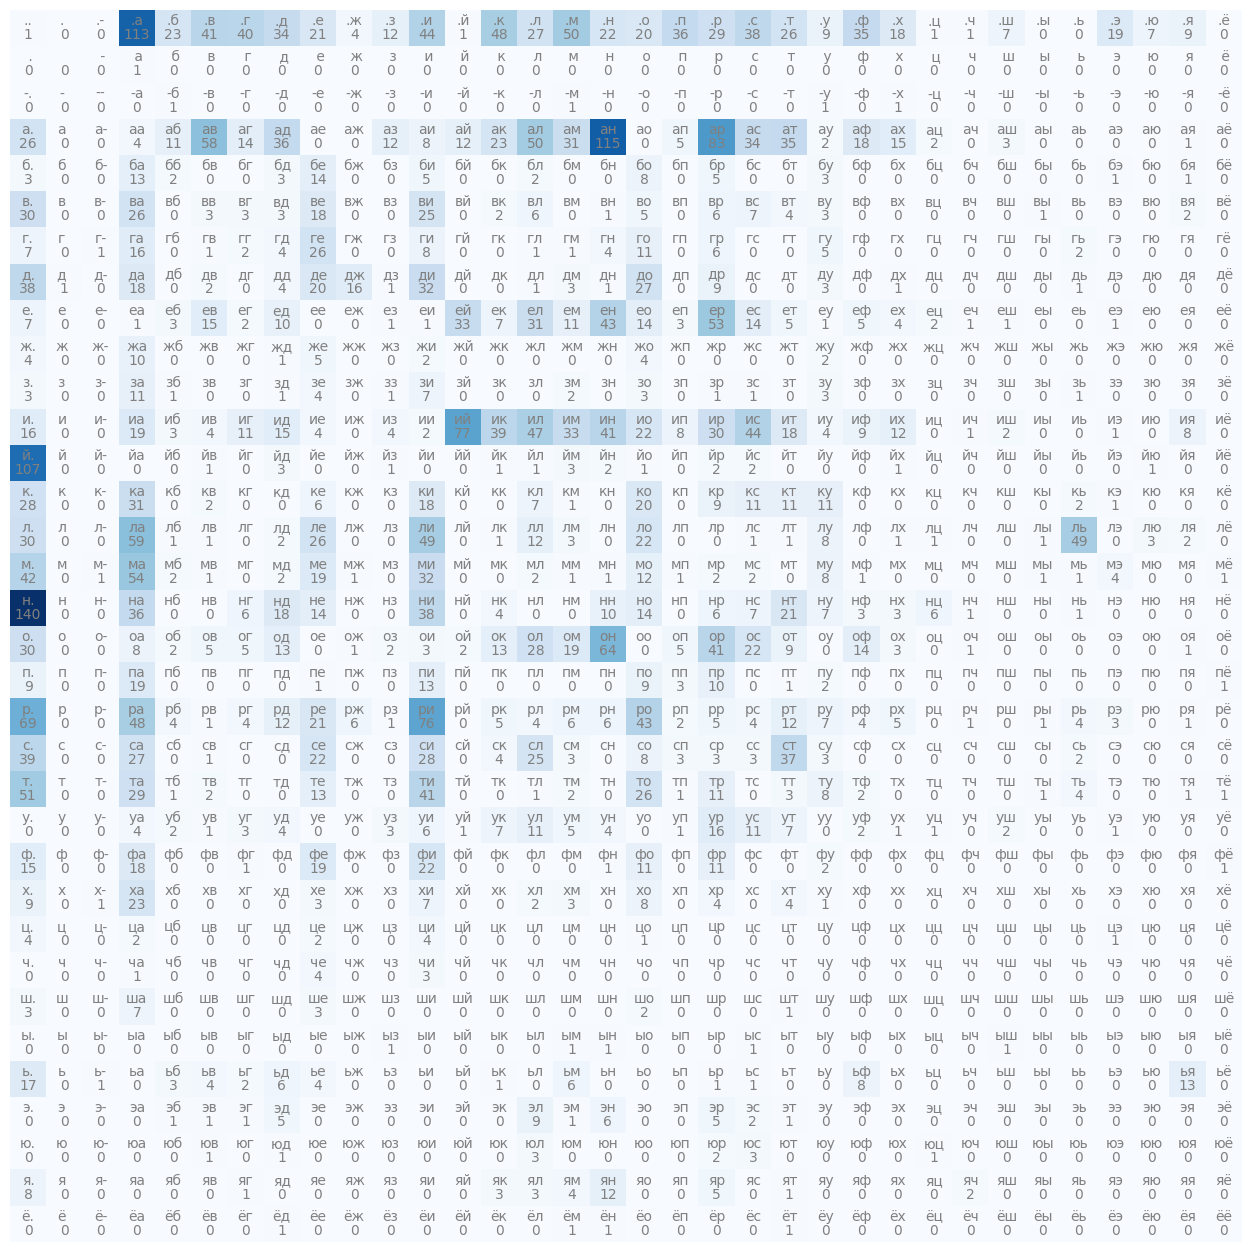

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(34):
    for j in range(34):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
N[0]

tensor([  1,   0,   0, 113,  23,  41,  40,  34,  21,   4,  12,  44,   1,  48,
         27,  50,  22,  20,  36,  29,  38,  26,   9,  35,  18,   1,   1,   7,
          0,   0,  19,   7,   9,   0], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0014, 0.0000, 0.0000, 0.1535, 0.0312, 0.0557, 0.0543, 0.0462, 0.0285,
        0.0054, 0.0163, 0.0598, 0.0014, 0.0652, 0.0367, 0.0679, 0.0299, 0.0272,
        0.0489, 0.0394, 0.0516, 0.0353, 0.0122, 0.0476, 0.0245, 0.0014, 0.0014,
        0.0095, 0.0000, 0.0000, 0.0258, 0.0095, 0.0122, 0.0000])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'я'

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [ ]:
p.shape

torch.Size([3])

In [ ]:
p.shape

torch.Size([3])

In [ ]:
P.sum(1, keepdim=True).shape

torch.Size([34, 1])

In [ ]:
# 27, 27
# 27,  1

In [ ]:
p.sum(1).shape

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
# 27, 27
#  1, 27

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [ ]:
g = torch.Generator().manual_seed(228)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

азмамуренг.
от.
гим--ялотиппавильмсийнфтастыхтикьмд.
яшцлейвгимуунн.
к.


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-13255.7568)
nll=tensor(13255.7568)
2.5081849098205566


In [ ]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. а
а а
а р
р о
о н
н .


In [ ]:
xs

tensor([ 0,  3,  3, 19, 17, 16])

In [ ]:
ys

tensor([ 3,  3, 19, 17, 16,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=34).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([6, 34])

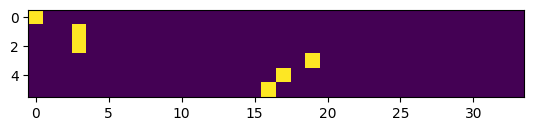

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype

In [ ]:
W = torch.randn((34, 1))
xenc @ W

In [ ]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
probs[0]

tensor([1.])

In [ ]:
probs[0].shape

torch.Size([1])

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((34, 34), generator=g)

In [ ]:
xenc = F.one_hot(xs, num_classes=34).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [ ]:
probs.shape

torch.Size([6, 34])

In [ ]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .а (indexes 0,3)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0543, 0.0089, 0.0110, 0.0038, 0.0151, 0.0110, 0.0024, 0.0207, 0.0123,
        0.0280, 0.0071, 0.0249, 0.0082, 0.0073, 0.0447, 0.2127, 0.0540, 0.0022,
        0.0223, 0.0049, 0.0303, 0.0098, 0.0026, 0.0177, 0.0105, 0.1375, 0.1305,
        0.0058, 0.0033, 0.0153, 0.0039, 0.0234, 0.0119, 0.0419])
label (actual next character): 3
probability assigned by the net to the the correct character: 0.003764939494431019
log likelihood: -5.582023620605469
negative log likelihood: 5.582023620605469
--------
bigram example 2: аа (indexes 3,3)
input to the neural net: 3
output probabilities from the neural net: tensor([0.0039, 0.0250, 0.0058, 0.0231, 0.0052, 0.0140, 0.0067, 0.0513, 0.0184,
        0.0558, 0.0387, 0.0033, 0.0160, 0.0242, 0.0037, 0.0351, 0.0799, 0.1080,
        0.0185, 0.0283, 0.0283, 0.0040, 0.0147, 0.0595, 0.0074, 0.0195, 0.0570,
        0.0854, 0.0238, 0.0239, 0.0

In [ ]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((34, 34), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=34).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [ ]:
print(loss.item())

4.029050827026367


In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((34, 34), generator=g, requires_grad=True)

number of examples:  5285


In [ ]:
# gradient descent
for k in range(10000):

  # forward pass
  xenc = F.one_hot(xs, num_classes=34).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  if k % 100 == 0:
    print(f"Epoch: {k}; loss: {loss.item()}")

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -10 * W.grad

Epoch: 0; loss: 3.9778084754943848
Epoch: 100; loss: 2.6413984298706055
Epoch: 200; loss: 2.5513176918029785
Epoch: 300; loss: 2.5193676948547363
Epoch: 400; loss: 2.502878427505493
Epoch: 500; loss: 2.492738723754883
Epoch: 600; loss: 2.4859447479248047
Epoch: 700; loss: 2.481168031692505
Epoch: 800; loss: 2.477692127227783
Epoch: 900; loss: 2.475090742111206
Epoch: 1000; loss: 2.473093032836914
Epoch: 1100; loss: 2.471524715423584
Epoch: 1200; loss: 2.470268726348877
Epoch: 1300; loss: 2.4692463874816895
Epoch: 1400; loss: 2.4684038162231445
Epoch: 1500; loss: 2.4677016735076904
Epoch: 1600; loss: 2.4671123027801514
Epoch: 1700; loss: 2.4666144847869873
Epoch: 1800; loss: 2.4661917686462402
Epoch: 1900; loss: 2.4658303260803223
Epoch: 2000; loss: 2.4655213356018066
Epoch: 2100; loss: 2.46525502204895
Epoch: 2200; loss: 2.465024471282959
Epoch: 2300; loss: 2.4648256301879883
Epoch: 2400; loss: 2.464651584625244
Epoch: 2500; loss: 2.4645001888275146
Epoch: 2600; loss: 2.464366912841797

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(32334)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=34).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

вирчй.
тран.
ро.
моамамвавил.
ацир.
